In [28]:
import pickle
import pandas as pd

pd.set_option("display.max_colwidth", 100)

In [65]:
answers_dict = []
answers_dict_train = []
answers_dict_test = []
count_dict = []
count_dict_train = []
count_dict_test = []

with open(f"../output/gpt3/gpt3-train-query_dict.pkl", "rb") as f:
    query_dict_train = pickle.load(f)
with open(f"../output/gpt3/gpt3-test-query_dict.pkl", "rb") as f:
    query_dict_test = pickle.load(f)

for query_id in query_dict_train.keys():
    with open(
        f"../output/stats/gpt3/gpt3-train-{query_id}-answers_dict.pkl", "rb"
    ) as f:
        answers_dict_train.append(pickle.load(f))
    with open(f"../output/stats/gpt3/gpt3-train-{query_id}-count_dict.pkl", "rb") as f:
        count_dict_train.append(pickle.load(f))

for query_id in query_dict_test.keys():
    with open(f"../output/stats/gpt3/gpt3-test-{query_id}-answers_dict.pkl", "rb") as f:
        answers_dict_test.append(pickle.load(f))
    with open(f"../output/stats/gpt3/gpt3-test-{query_id}-count_dict.pkl", "rb") as f:
        count_dict_test.append(pickle.load(f))

# merge train and test
for i in range(len(count_dict_train)):
    count_dict.append(count_dict_train[i])
    for key in count_dict[-1].keys():
        try:
            count_dict[i][key] += count_dict_test[i][key]
        except KeyError:
            pass
count_dict

[{'empty': 226,
  'error': 237,
  'uri': 50,
  'literal': 13,
  'number': 17,
  'date': 4,
  'boolean': 11},
 {'empty': 155,
  'error': 316,
  'uri': 47,
  'literal': 4,
  'number': 25,
  'date': 4,
  'boolean': 7},
 {'error': 266,
  'uri': 58,
  'empty': 202,
  'literal': 5,
  'number': 14,
  'date': 6,
  'boolean': 7},
 {'empty': 285,
  'error': 139,
  'uri': 72,
  'literal': 11,
  'number': 26,
  'date': 7,
  'boolean': 18},
 {'uri': 99,
  'error': 136,
  'empty': 282,
  'literal': 6,
  'number': 20,
  'date': 8,
  'boolean': 7}]

In [67]:
count_df = pd.DataFrame([], columns=query_dict_train.keys())
for i, query_id in enumerate(query_dict_train.keys()):
    aux_df = pd.DataFrame.from_dict(count_dict[i], orient="index", columns=["count"])
    aux_df = aux_df.sort_values(by=["count"], ascending=False)
    count_df[query_id] = aux_df["count"]
count_df

,Q1,Q2,Q3,Q4,Q5
error,237,316,266,139,136
empty,226,155,202,285,282
uri,50,47,58,72,99
number,17,25,14,26,20
literal,13,4,5,11,6
boolean,11,7,7,18,7
date,4,4,6,7,8


<Figure size 1000x1000 with 0 Axes>

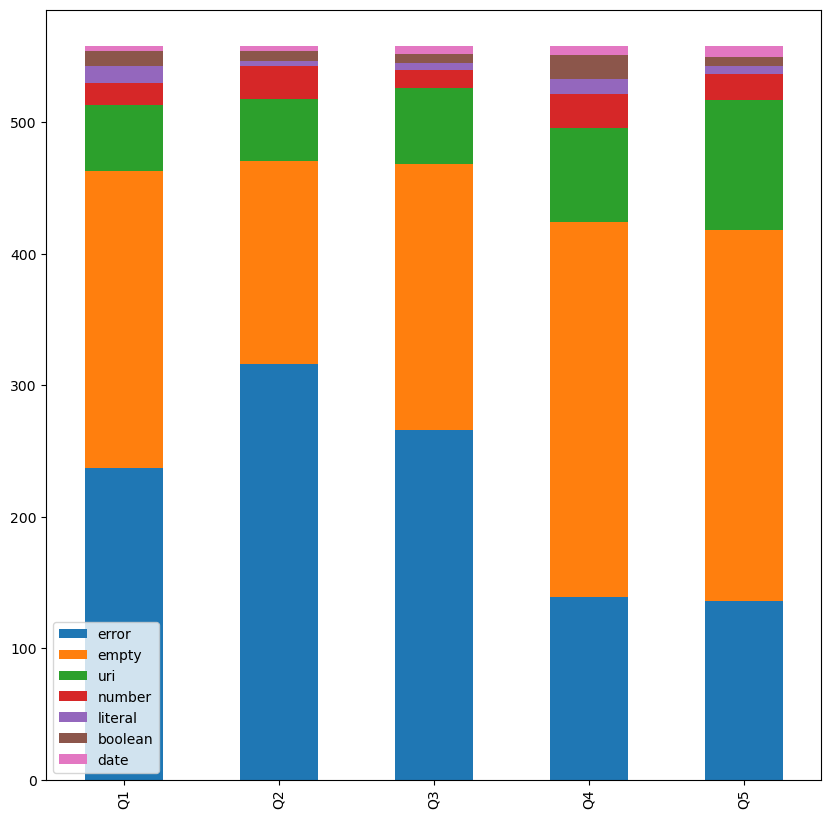

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
# stacked bar plot
count_df.T.plot.bar(stacked=True, figsize=(10, 10))
plt.ylim(0, sum(count_dict[0].values()) + 1)
plt.ylabel("Count")
plt.xlabel("Question ID")
plt.savefig(
    "../figures/gpt3/stacked_bar_all.png", bbox_inches="tight", dpi=300, pad_inches=0
)
plt.show()

<Figure size 1000x1000 with 0 Axes>

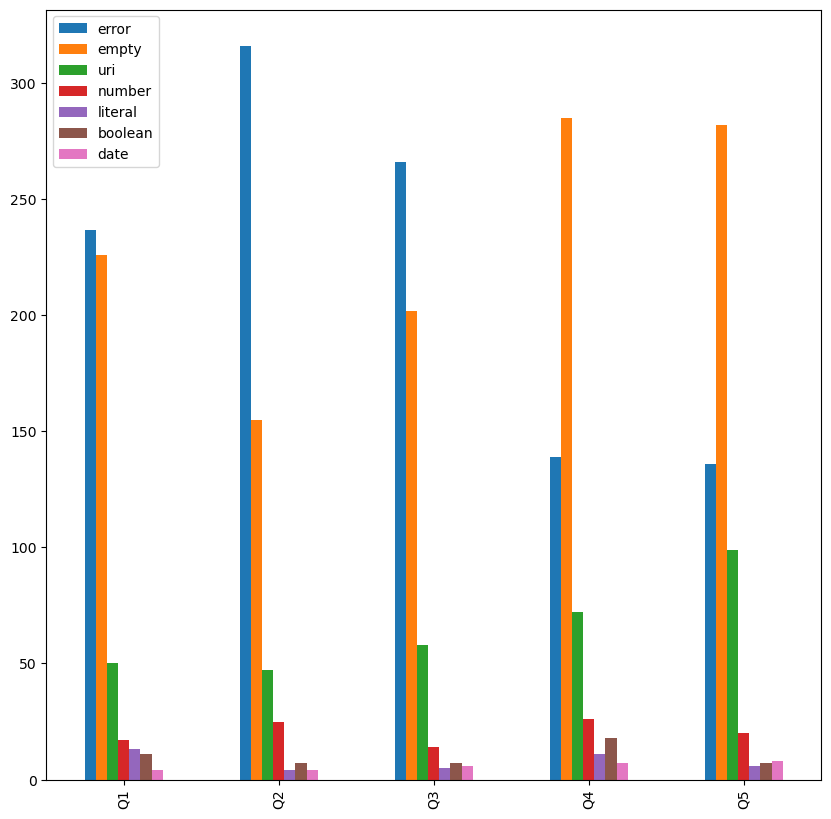

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
# grouped bar plot
count_df.T.plot.bar(figsize=(10, 10))
plt.ylim(0, sum(count_dict[0].values()) + 1)
plt.ylabel("Count")
plt.xlabel("Question ID")
plt.savefig(
    "../figures/gpt3/grouped_bar_all.png", bbox_inches="tight", dpi=300, pad_inches=0
)
plt.show()

<Figure size 1000x1000 with 0 Axes>

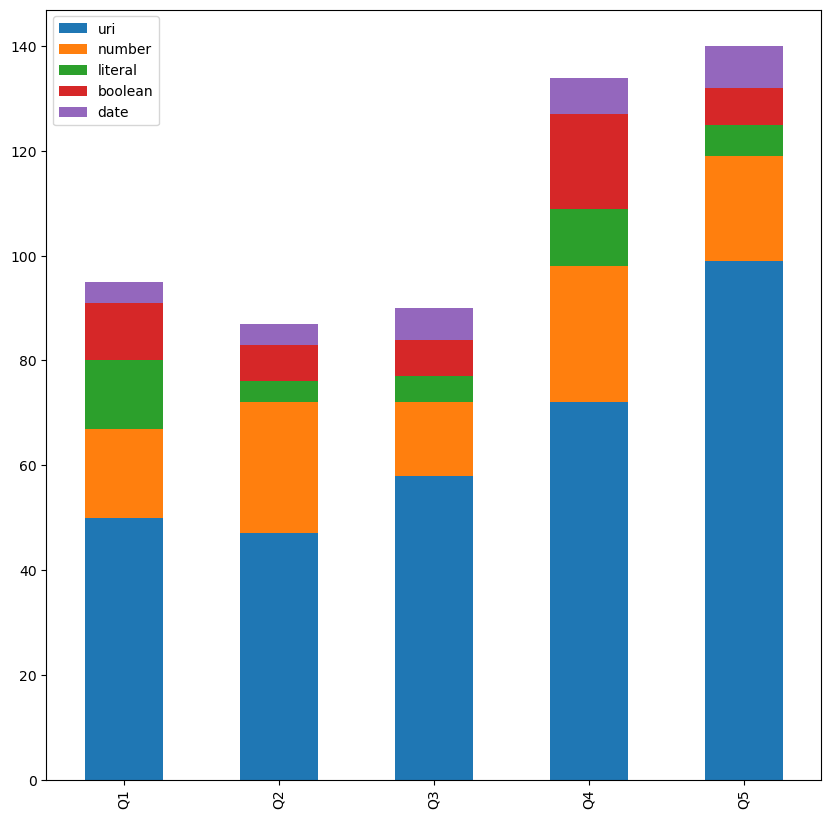

In [71]:
import matplotlib.pyplot as plt

# count_df without error and empty
count_df_filtered = count_df.drop(["error", "empty"], axis=0)

plt.figure(figsize=(10, 10))
# stacked bar plot
count_df_filtered.T.plot.bar(stacked=True, figsize=(10, 10))
plt.ylim(0, sum(count_dict[0].values()) + 1)
plt.ylabel("Count")
plt.xlabel("Question ID")
plt.savefig(
    "../figures/gpt3/stacked_bar_filtered.png",
    bbox_inches="tight",
    dpi=300,
    pad_inches=0,
)
plt.show()

<Figure size 1000x1000 with 0 Axes>

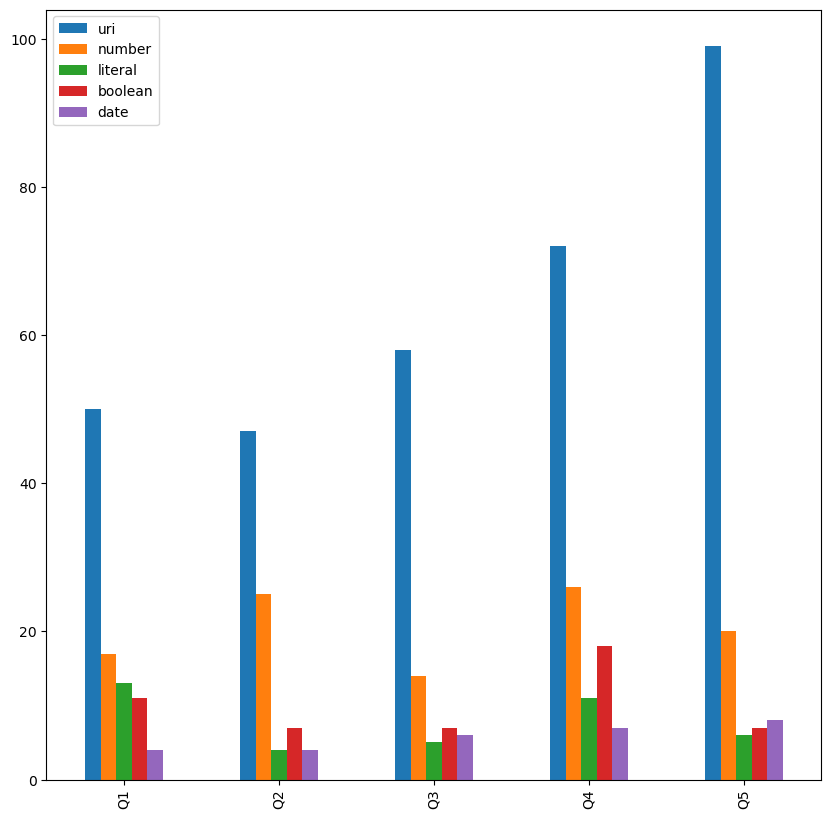

In [73]:
import matplotlib.pyplot as plt

# count_df without error and empty
count_df_filtered = count_df.drop(["error", "empty"], axis=0)

plt.figure(figsize=(10, 10))
# grouped bar plot
count_df_filtered.T.plot.bar(figsize=(10, 10))
plt.ylim(0, sum(count_dict[0].values()) + 1)
plt.ylabel("Count")
plt.xlabel("Question ID")
plt.savefig(
    "../figures/gpt3/grouped_bar_filtered.png",
    bbox_inches="tight",
    dpi=300,
    pad_inches=0,
)
plt.show()